# Modelos de Regresión Lineal
## Modelo con datos simulados
* y = a + b * x
* X : 100 valores distribuídos según una N(1.5, 2.5)
* Ye = 5 + 1.9 * x + e
* e estará distribuído según una N(0, 0.8)

In [85]:
import pandas as pd
import numpy as np

In [86]:
x = 1.5 + 2.5 * np.random.randn(100)

In [87]:
res = 0 + 0.8 * np.random.randn(100)

In [88]:
y_pred = 5 + 1.9 * x

In [89]:
y_act = 5 + 1.9 * x + res

In [90]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [91]:
data = pd.DataFrame(
    {
        "x":x_list,
        "y_actual":y_act_list,
        "y_prediccion":y_pred_list
    }
)

In [92]:
data.head()

,x,y_actual,y_prediccion
0,1.788117,8.723424,8.397423
1,1.501421,8.831647,7.852699
2,-0.287083,3.220750,4.454543
3,0.808567,6.645250,6.536278
4,2.383497,10.285402,9.528644


In [93]:
import matplotlib.pyplot as plt

In [94]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

Text(0.5,1,'Valor Actual vs Predicción')

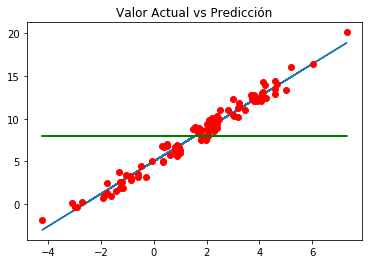

In [95]:
%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.title("Valor Actual vs Predicción")

## ¿Como es la predicción de buena?
* SST = SSD + SSR
* SST : Variabilidad de los datos con respecto de su media
* SSD : Diferencia entre los datos originales y las predicciones que el modelo no es capaz de explicar (errores que deberían seguir una distribución normal)
* SSR : Diferencia entre la regresión y el valor medio que el modelo busca explicar
* R2 = SSR / SST, coeficiente de determinación entre 0 y 1

In [96]:
y_m = np.mean(y_act)
data["SSR"]=(data["y_prediccion"]-y_m)**2
data["SSD"]=(data["y_prediccion"]-data["y_actual"])**2
data["SST"]=(data["y_actual"]-y_m)**2

In [97]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,1.788117,8.723424,8.397423,0.223888,0.106277,0.638672
1,1.501421,8.831647,7.852699,0.005120,0.958339,0.823362
2,-0.287083,3.220750,4.454543,12.038898,1.522245,22.122954
3,0.808567,6.645250,6.536278,1.926479,0.011875,1.635851
4,2.383497,10.285402,9.528644,2.574067,0.572683,5.575021


In [98]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [99]:
SSR

1789.2691189346383

In [100]:
SSD

48.970209369444625

In [101]:
SST

1884.123325271543

In [102]:
SSR+SSD

1838.2393283040828

In [103]:
R2 = SSR/SST

In [104]:
R2

0.9496560521996434

(array([ 3.,  9.,  9., 13., 22., 10., 15., 10.,  3.,  6.]),
 array([-1.57615518, -1.25722405, -0.93829292, -0.61936179, -0.30043067,
         0.01850046,  0.33743159,  0.65636272,  0.97529385,  1.29422497,
         1.6131561 ]),
 <BarContainer object of 10 artists>)

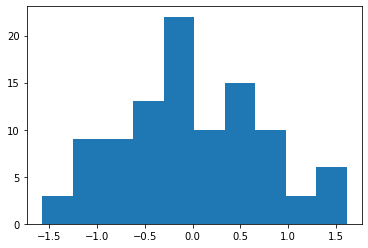

In [21]:
plt.hist(data["y_prediccion"]-data["y_actual"])

## Obteniendo la recta de regresión 

* y = a + b * x
* b = sum((xi - x_m)*(y_i-y_m))/sum((xi-x_m)^2)
* a = y_m - b * x_m

In [106]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(1.5182335458569955, 7.924254166306463)

In [107]:
data["beta_n"] = (data["x"]-x_mean)*(data["y_actual"]-y_mean)
data["beta_d"] = (data["x"]-x_mean)**2

In [108]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [109]:
alpha = y_mean - beta * x_mean

In [110]:
alpha, beta

(5.002367327220144, 1.9245305487154187)

### El modelo lineal obtenido por regresión es:
### y = 5.042341442370516 + 1.9044490309709992 * x

In [111]:
data["y_model"] = alpha + beta * data["x"]

In [112]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,1.788117,8.723424,8.397423,0.223888,0.106277,0.638672,0.215683,0.072837,8.443654
1,1.501421,8.831647,7.852699,0.005120,0.958339,0.823362,-0.015256,0.000283,7.891897
2,-0.287083,3.220750,4.454543,12.038898,1.522245,22.122954,8.491314,3.259167,4.449868
3,0.808567,6.645250,6.536278,1.926479,0.011875,1.635851,0.907666,0.503626,6.558480
4,2.383497,10.285402,9.528644,2.574067,0.572683,5.575021,2.043015,0.748681,9.589480


In [113]:
SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"]-data["y_actual"])**2)
SST = sum((data["y_actual"]-y_mean)**2)

In [114]:
SSR, SSD, SST

(1835.608240101765, 48.515085169777045, 1884.123325271543)

In [116]:
R2 = SSR / SST
R2

0.9742505787603972

Text(0.5,1,'Valor Actual vs Predicción')

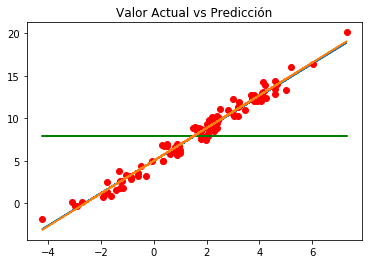

In [117]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.plot(data["x"], data["y_model"])
plt.title("Valor Actual vs Predicción")

## Error estándar de los residuos (RSE)

In [118]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.703599239260192

In [119]:
np.mean(data["y_actual"])

7.924254166306463

In [120]:
RSE / np.mean(data["y_actual"])

0.08879059460912563